# Eat Safe, Love

## Notebook Set Up

In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [4]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [5]:
# assign the collection to a variable
establishments = db['establishments']

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [6]:
establishments.find_one()

{'_id': ObjectId('65d13da6d2220ff58e03141d'),
 'FHRSID': 1043695,
 'ChangesByServerID': 0,
 'LocalAuthorityBusinessID': 'PI/000073616',
 'BusinessName': 'The Pavilion',
 'BusinessType': 'Restaurant/Cafe/Canteen',
 'BusinessTypeID': 1,
 'AddressLine1': 'East Cliff Pavilion',
 'AddressLine2': 'Wear Bay Road',
 'AddressLine3': 'Folkestone',
 'AddressLine4': 'Kent',
 'PostCode': 'CT19 6BL',
 'Phone': '',
 'RatingValue': 5.0,
 'RatingKey': 'fhrs_5_en-gb',
 'RatingDate': '2018-04-04T00:00:00',
 'LocalAuthorityCode': '188',
 'LocalAuthorityName': 'Folkestone and Hythe',
 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
 'scores': {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5},
 'SchemeType': 'FHRS',
 'geocode': {'longitude': 1.195625, 'latitude': 51.083812},
 'RightToReply': '',
 'Distance': 4591.765489457773,
 'NewRatingPending': False,
 'meta': {'dataSource': None,
  'extractDate': '0001-01-01T00:

In [7]:
# Find the establishments with a hygiene score of 20
query ={'scores.Hygiene' : 20}
hygiene20 = list(establishments.find(query))

# Use count_documents to display the number of documents in the result
num_hygiene20 = establishments.count_documents(query)
print(f'Total of resturarant with hygiene score of 20 is: {num_hygiene20}')

# Display the first document in the results using pprint
pprint(hygiene20[0])


Total of resturarant with hygiene score of 20 is: 41
{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': 0.0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('65d13da7d2220ff58e032f4c'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self'}

In [30]:
# Convert the result to a Pandas DataFrame
hygiene20_df = pd.DataFrame(hygiene20)

# Display the number of rows in the DataFrame
total_rows = len(hygiene20_df['_id'].unique())
print(f' total resturants with the highest hygiene score in the dataframe: {total_rows}')

# Display the first 10 rows of the DataFrame
hygiene20_df.head(10)

 total resturants with the highest hygiene score in the dataframe: 41


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,65d13da7d2220ff58e032f4c,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,65d13da7d2220ff58e0332ce,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,65d13da7d2220ff58e0335d7,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,65d13da7d2220ff58e0337cf,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,65d13da7d2220ff58e0337e8,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,65d13da7d2220ff58e034172,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,65d13da7d2220ff58e034396,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,65d13da7d2220ff58e0358da,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,65d13da7d2220ff58e035d06,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [9]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query = {'LocalAuthorityName': {'$regex': 'London'}, 
          'RatingValue': {'$gte': 4}}

london_rating4 = list(establishments.find(query))

# Use count_documents to display the number of documents in the result
number_london_rating4 = establishments.count_documents(query)
print(f'The total number of resturants in London with rating value >= 4 is: {number_london_rating4}')
# Display the first document in the results using pprint
pprint(london_rating4[0])

The total number of resturants in London with rating value >= 4 is: 33
{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': 4.0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('65d13da7d2220ff58e034968'),
 'geocode': {'latitude': 51.369321, 'longitude': 0.508551},
 'links': [{'href': 'https://ap

In [31]:
# Convert the result to a Pandas DataFrame
london_rating4_df = pd.DataFrame(london_rating4)
# Display the number of rows in the DataFrame
total_rows = len(london_rating4_df['_id'].unique())
print(f' The total number of resturants in London with rating value >= 4 is: {total_rows}')

# Display the first 10 rows of the DataFrame
london_rating4_df.head(10)


 The total number of resturants in London with rating value >= 4 is: 33


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,65d13da7d2220ff58e034968,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,65d13da7d2220ff58e034c8f,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,65d13da7d2220ff58e0357de,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,65d13da7d2220ff58e0365e3,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,65d13da7d2220ff58e0365ea,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,65d13da7d2220ff58e036ce6,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,65d13da7d2220ff58e038df3,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,65d13da8d2220ff58e0391b8,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.048006, 'latitude': 51.503733}",,4649.173485,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,65d13da8

### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [22]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score
Penang_info = establishments.find_one({"BusinessName":"Penang Flavours"})
long_Penang = Penang_info['geocode']['longitude']
lat_Penang = Penang_info['geocode']['latitude']

degree_search = 0.01
latitude = [lat_Penang-degree_search, lat_Penang+degree_search]
longitude = [long_Penang-degree_search, long_Penang+degree_search]

query = {'RatingValue': 5,
         'geocode.longitude': {'$gte': longitude[0], '$lte': longitude[1]},
         'geocode.latitude': {'$gte': latitude[0], '$lte': latitude[1]}}

sort = [('scores.Hygiene', 1)]

limit = 5


resturant_closest_top5 = list(establishments.find(query).sort(sort).limit(limit))


# Print the results
for resturant in resturant_closest_top5:
    pprint(resturant)

{'AddressLine1': '130 - 132 Plumstead High Street',
 'AddressLine2': '',
 'AddressLine3': 'Plumstead',
 'AddressLine4': 'Greenwich',
 'BusinessName': 'Volunteer',
 'BusinessType': 'Pub/bar/nightclub',
 'BusinessTypeID': 7843,
 'ChangesByServerID': 0,
 'Distance': 4646.965634598608,
 'FHRSID': 694609,
 'LocalAuthorityBusinessID': 'PI/000116619',
 'LocalAuthorityCode': '511',
 'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
 'LocalAuthorityName': 'Greenwich',
 'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'SE18 1JQ',
 'RatingDate': '2019-08-05T00:00:00',
 'RatingKey': 'fhrs_5_en-gb',
 'RatingValue': 5.0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('65d13da7d2220ff58e0387ae'),
 'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
 'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/694609',
            'rel': 'self'}],
 'meta': {'dataSource': None,
          'extractDat

In [28]:
# Convert result to Pandas DataFrame
resturant_closest_top5_df = pd.DataFrame(resturant_closest_top5)


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [13]:
# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest

match_query = {'$match' : {'scores.Hygiene' : 0}}

group_query = {'$group' : {'_id' :  '$LocalAuthorityName',
                              'total_count' : { '$sum': 1 }}}

sort_query = {'$sort' : {'total_count': -1}}

pipeline = [match_query,group_query, sort_query]

results = list(establishments.aggregate(pipeline))

# Print the number of documents in the result
print(len(results))
# Print the first 10 results
pprint(results[0:10])

55
[{'_id': 'Thanet', 'total_count': 1130},
 {'_id': 'Greenwich', 'total_count': 882},
 {'_id': 'Maidstone', 'total_count': 713},
 {'_id': 'Newham', 'total_count': 711},
 {'_id': 'Swale', 'total_count': 686},
 {'_id': 'Chelmsford', 'total_count': 680},
 {'_id': 'Medway', 'total_count': 672},
 {'_id': 'Bexley', 'total_count': 607},
 {'_id': 'Southend-On-Sea', 'total_count': 586},
 {'_id': 'Tendring', 'total_count': 542}]


In [14]:
# Convert the result to a Pandas DataFrame
results_df = pd.DataFrame(results)
# Display the number of rows in the DataFrame
print(len(results_df['_id'].unique()))
# Display the first 10 rows of the DataFrame
results_df.head(10)

55


,_id,total_count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


In [23]:
results_df.set_index('_id', inplace=True)

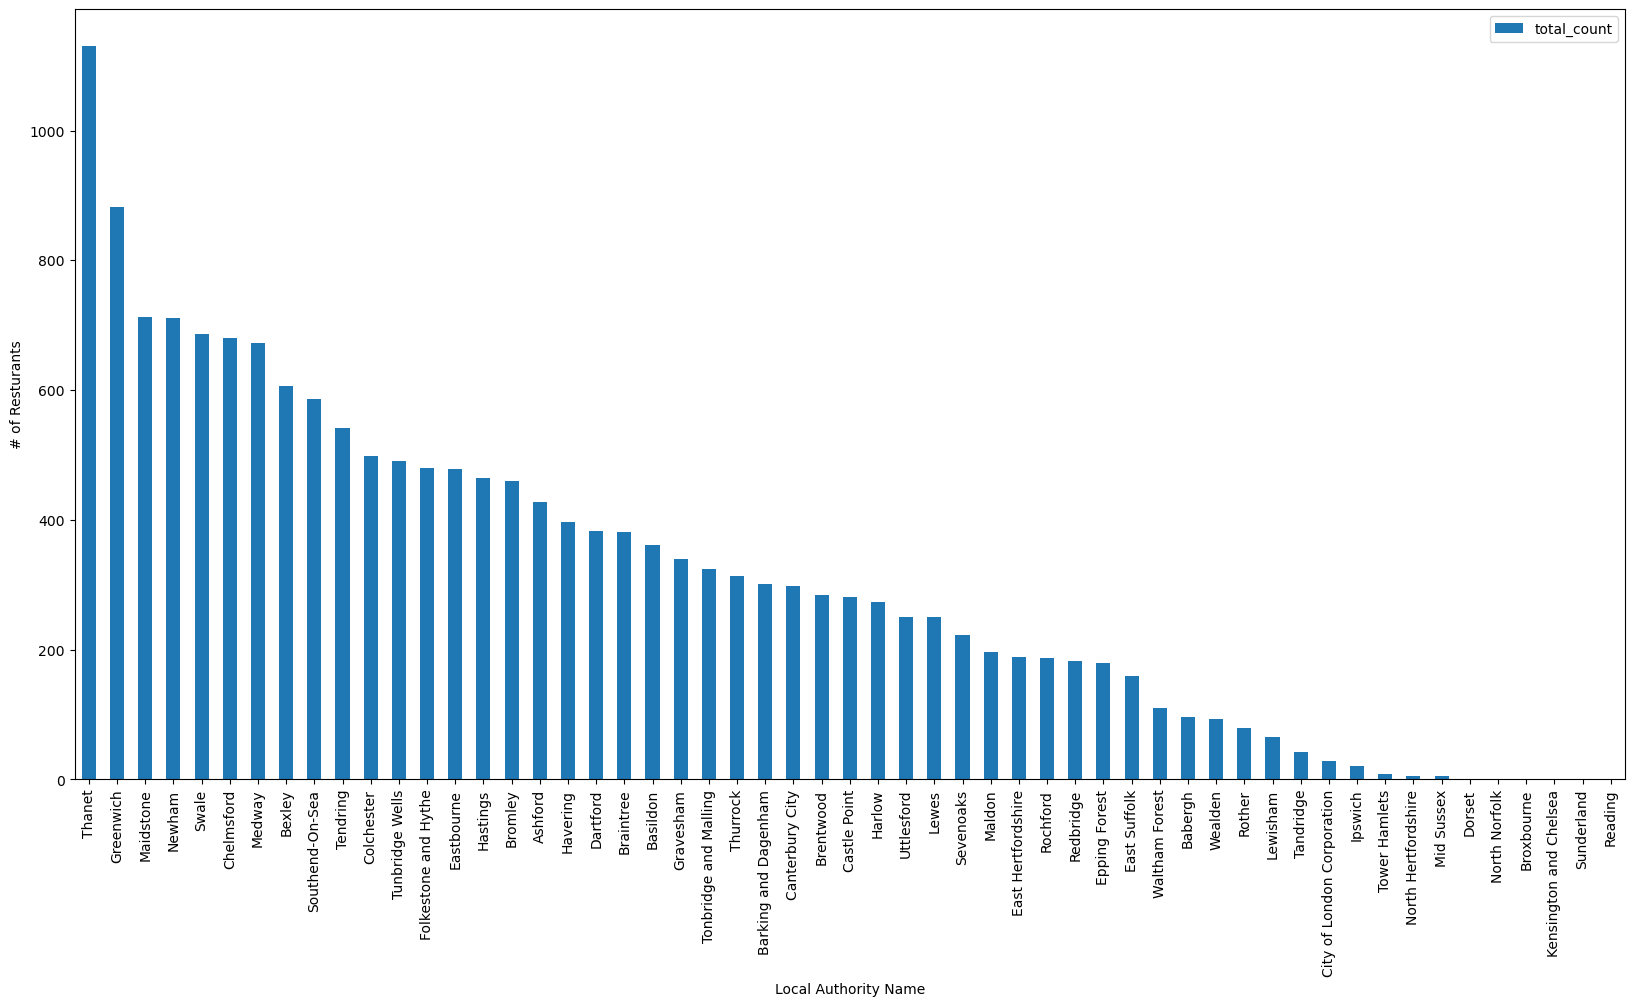

In [25]:
# Plot the count of resturants in each Local Authority area   
results_df.plot(kind ='bar',xlabel='Local Authority Name', ylabel = '# of Resturants',  figsize=(20,10))
plt.show()